# <div align="center"><b> Desafio 1 - Procesamiento del lenguaje Natural - CEIA </b></div>

<div align="right">📝 <em><small><font color='Gray'>Nota:</font></small></em></div>

<div align="right"> <em><small><font color='Gray'> La funcionalidad de visualización de jupyter notebooks en <a href="https://github.com/" target="_blank">github</a> es solamente un preview.</font></small></em> </div>

<div align="right"> <em><small><font color='Gray'> Para mejor visualización se sugiere utilizar el visualizador recomndado por la comunidad: <a href="https://nbviewer.org/" target="_blank">nbviewer</a></font></small></em> </div>

<div align="right"> <em><small><font color='Gray'> Puedes a acceder al sigiente enlace para ver este notebook en dicha página: <a href="(https://nbviewer.org/github/brunomaso1/uba-ceia/blob/ceia-nlp/ceia-nlp/Desafio%201.ipynb">Desafio 1</a></font></small></em> </div>

* * *

<style>
/* Limitar la altura de las celdas de salida en html */
.jp-OutputArea.jp-Cell-outputArea {
    max-height: 500px;
}
</style>

<center>

<img src="" width="600" alt="">

<small><em>Figura 1: A data scientist is working on a computer. The lighting is dim and the color scheme is blue. The Naive Bayes formula is displayed on the screen. - Generada con Microsoft Image Creator</em></small>

</center>

<div align="center"><img src="./resources/Desafio_1_portada.jpeg" width="600" alt="Figura 1: A data scientist is working on a computer. The lighting is dim and the color scheme is blue. The Naive Bayes formula is displayed on the screen. - Generada con Microsoft Image Creator"></div>

<div align="center"><small><em>Figura 1: Figura 1: A data scientist is working on a computer. The lighting is dim and the color scheme is blue. The Naive Bayes formula is displayed on the screen. - Generada con Microsoft Image Creator</em></small></div>

<div align="center">✨Datos del proyecto:✨</div>

<p></p>

<div align="center">

| Subtitulo       | Desafío 1 - NLP - FIUBA                                                                                                                |
| --------------- | -------------------------------------------------------------------------------------------------------------------------------------- |
| **Descrpción**  | Word vectorizer + Naive bayes                                                                                                          |
| **Integrantes** | Bruno Masoller (brunomaso1@gmail.com)                                                                                                  |

</div>

✋ <em><font color='DodgerBlue'>Importaciones:</font></em> ✋

In [1]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.metrics import f1_score
import pandas as pd
from IPython.display import display, HTML
import tabulate
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

# 20newsgroups por ser un dataset clásico de NLP ya viene incluido y formateado
# en sklearn
from sklearn.datasets import fetch_20newsgroups
import numpy as np

🔧 <em><font color='tomato'>Configuraciones:</font></em> 🔧

In [2]:
END_OF_DOCUMENT = 150 # Tamaño de impresión de documentos
RANDOM_SEED = 42

*Carga de datos:*

In [3]:
# cargamos los datos (ya separados de forma predeterminada en train y test)
newsgroups_train = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))
newsgroups_test = fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'))

## Consigna del desafío 1

**1**. Vectorizar documentos. Tomar 5 documentos al azar y medir similaridad con el resto de los documentos.
Estudiar los 5 documentos más similares de cada uno analizar si tiene sentido
la similaridad según el contenido del texto y la etiqueta de clasificación.

**2**. Entrenar modelos de clasificación Naïve Bayes para maximizar el desempeño de clasificación
(f1-score macro) en el conjunto de datos de test. Considerar cambiar parámteros
de instanciación del vectorizador y los modelos y probar modelos de Naïve Bayes Multinomial
y ComplementNB.

**3**. Transponer la matriz documento-término. De esa manera se obtiene una matriz
término-documento que puede ser interpretada como una colección de vectorización de palabras.
Estudiar ahora similaridad entre palabras tomando 5 palabras y estudiando sus 5 más similares. **La elección de palabras no debe ser al azar para evitar la aparición de términos poco interpretables, elegirlas "manualmente"**.


## Resolución

### Parte 1

> Vectorizar documentos.  
Tomar 5 documentos al azar y medir similaridad con el resto de los documentos.  
Estudiar los 5 documentos más similares de cada uno analizar si tiene sentido
la similaridad según el contenido del texto y la etiqueta de clasificación.

*Vectorización:*

*Vectorizamos el conjunto utilizando TF-IDF.*

In [4]:
tfidfvect = TfidfVectorizer()
# Fieteamos y transformamos el conjunto X_train
X_train = tfidfvect.fit_transform(newsgroups_train.data)
# Obtenemos el conjunto y_train
y_train = newsgroups_train.target

# Obtenemos también el diccionario inverso
idx2word = {v: k for k,v in tfidfvect.vocabulary_.items()}

*Observamos el vocabulario vectorizado:*

In [5]:
tfidfvect.vocabulary_

{'was': 95844,
 'wondering': 97181,
 'if': 48754,
 'anyone': 18915,
 'out': 68847,
 'there': 88638,
 'could': 30074,
 'enlighten': 37335,
 'me': 60560,
 'on': 68080,
 'this': 88767,
 'car': 25775,
 'saw': 80623,
 'the': 88532,
 'other': 68781,
 'day': 31990,
 'it': 51326,
 'door': 34809,
 'sports': 84538,
 'looked': 57390,
 'to': 89360,
 'be': 21987,
 'from': 41715,
 'late': 55746,
 '60s': 9843,
 'early': 35974,
 '70s': 11174,
 'called': 25492,
 'bricklin': 24160,
 'doors': 34810,
 'were': 96247,
 'really': 76471,
 'small': 83426,
 'in': 49447,
 'addition': 16809,
 'front': 41724,
 'bumper': 24635,
 'separate': 81658,
 'rest': 77878,
 'of': 67670,
 'body': 23480,
 'is': 51136,
 'all': 17936,
 'know': 54632,
 'can': 25590,
 'tellme': 88143,
 'model': 62746,
 'name': 64931,
 'engine': 37287,
 'specs': 84276,
 'years': 99911,
 'production': 73373,
 'where': 96433,
 'made': 59079,
 'history': 46814,
 'or': 68409,
 'whatever': 96395,
 'info': 49932,
 'you': 100208,
 'have': 45885,
 'funky':

*Observamos el vector idf:*

In [6]:
tfidfvect.idf_

array([4.83671633, 4.76173053, 8.25444302, ..., 9.64073738, 9.64073738,
       9.64073738])

*Observamos la cantidad de términos del vocabulario:*

In [7]:
len(tfidfvect.vocabulary_)

101631

*Medimos la similaridad de 5 documentos al azar y estudiamos su similaridad:*

In [8]:
df_data = []

rng = np.random.default_rng(seed=RANDOM_SEED)
X_train_size = X_train.shape[0]

for i in range(5):
    random_index = rng.integers(X_train_size)

    # Obtenego la similaridad de coseno.
    # Le hago flatten dado que devuelve como arrelgo interno.
    # Lo ordeno de mayor a menor.
    # Elimino el primer elemento, que es el mismo documento y me quedo con los 5 siguientes.
    # Hago esto tanto para los índices como los valores
    cos_sim_docs = cosine_similarity(X_train[random_index], X_train).flatten()
    cos_sim_docs_val = np.sort(cos_sim_docs)[::-1][1:6]
    cos_sim_docs_idx = np.argsort(cos_sim_docs)[::-1][1:6]

    df_row = {
        "Indice": random_index,
        "Doc Original": f"Clase: {newsgroups_train.target_names[y_train[random_index]]} | Documento\n: {newsgroups_train.data[random_index][:END_OF_DOCUMENT]}",
        "Doc Similar 1": f"Clase: {newsgroups_train.target_names[y_train[cos_sim_docs_idx[0]]]} | Valor : {cos_sim_docs_val[0]:.2f} | Documento: {newsgroups_train.data[cos_sim_docs_idx[0]][:END_OF_DOCUMENT]}",
        "Doc Similar 2": f"Clase: {newsgroups_train.target_names[y_train[cos_sim_docs_idx[1]]]} | Valor : {cos_sim_docs_val[1]:.2f} | Documento: {newsgroups_train.data[cos_sim_docs_idx[1]][:END_OF_DOCUMENT]}",
        "Doc Similar 3": f"Clase: {newsgroups_train.target_names[y_train[cos_sim_docs_idx[2]]]} | Valor : {cos_sim_docs_val[2]:.2f} | Documento: {newsgroups_train.data[cos_sim_docs_idx[2]][:END_OF_DOCUMENT]}",
        "Doc Similar 4": f"Clase: {newsgroups_train.target_names[y_train[cos_sim_docs_idx[3]]]} | Valor : {cos_sim_docs_val[3]:.2f} | Documento: {newsgroups_train.data[cos_sim_docs_idx[3]][:END_OF_DOCUMENT]}",
        "Doc Similar 5": f"Clase: {newsgroups_train.target_names[y_train[cos_sim_docs_idx[4]]]} | Valor : {cos_sim_docs_val[4]:.2f} | Documento: {newsgroups_train.data[cos_sim_docs_idx[4]][:END_OF_DOCUMENT]}",
    }

    df_data.insert(0, df_row)

df = pd.DataFrame(df_data)
# print(df.to_markdown())
display(HTML(df.to_html()))

,Indice,Doc Original,Doc Similar 1,Doc Similar 2,Doc Similar 3,Doc Similar 4,Doc Similar 5
0,4899,Clase: sci.crypt | Documento\n: ...\n\nHaven't you read any of Noam Chomsky's works? A widely used information net\noutside the control of the 'right people' is unthinkable. Hundreds of,Clase: talk.politics.mideast | Valor : 0.20 | Documento: \n\n[After a small refresh Hasan got on the track again.]\n\n\n\n\n |> |> I get the impression Hasan realized he goofed and is now\n |> |> trying to,"Clase: sci.crypt | Valor : 0.20 | Documento: \nThanks for posting this and making it available. This post will be LONG, I will\ncomment on most of it, and am reluctantly leaving all of the original","Clase: alt.atheism | Valor : 0.19 | Documento: The recent rise of nostalgia in this group, combined with the\n incredible level of utter bullshit, has prompted me to comb\n through my archives and","Clase: sci.crypt | Valor : 0.19 | Documento: \nRead it again yourself, then re-apply the admonition you gave to the\nprevious poster to yourself, as well. The first clause is not a condition,\nit i","Clase: sci.crypt | Valor : 0.19 | Documento: \n\nIt is incompetent, like almost anything you have posted here, so\nyou'll be flamed, sorry.\n\n\n%/$( your ""20 years of background in two Fortune 50 comp"
1,4965,"Clase: comp.sys.mac.hardware | Documento\n: \nNo. Plug the printer in the printer port, and the modem in the modem\nport. ;)",Clase: comp.sys.mac.hardware | Valor : 0.37 | Documento: \nBattery powered devices like the PowerBook are sometimes more sensitive to \nserial port weirdness. I had trouble with connecting my Mac Plus to an H,"Clase: comp.sys.mac.hardware | Valor : 0.36 | Documento: I have used both my serial ports with a modem and a serial printer, \nso I cannot use Appletalk. Is there a Ethernet to Localtalk hardware\nthat will l",Clase: comp.sys.ibm.pc.hardware | Valor : 0.36 | Documento: Can anybody please help me with information on the use of the bi-directional\nprinter port.\n\nI have successfully used one on a Toshiba laptop by enabli,"Clase: comp.sys.ibm.pc.hardware | Valor : 0.34 | Documento: With a sound card on interrupt 5, two serial ports (one for modem on i4,\none for Miracle Piano on i3) and a printer port on i7, I have run out of\nlow","Clase: comp.graphics | Valor : 0.34 | Documento: Printer model and specification:\n\nCanon CLC 500 (Color Laser Copier)\nps-ipu unit (postscript intelligent processing unit)\n\n\nHello,\n\nWe have recently p"
2,7405,"Clase: talk.politics.guns | Documento\n: \n\nSo, you have the right unless the Federal Government says you don't.\nI don't think I like this very much.\n\nThis would be much better if it said ""eve","Clase: talk.politics.misc | Valor : 0.37 | Documento: \n Horrors, appealing to popular principles. Can we perhaps as the\nquestion of whether the Constitution might have been written to appeal\nto the","Clase: sci.crypt | Valor : 0.37 | Documento: \nI am not an expert in the cryptography science, but some basic things\nseem evident to me, things which this Clinton Clipper do not address.\nThe all p","Clase: talk.politics.guns | Valor : 0.35 | Documento: <-> > But, do you knew how much organization is required to training a large\n<-> > group of poeple twice a year. Just to try to get the same people\n<","Clase: sci.crypt | Valor : 0.33 | Documento: \nRead it again yourself, then re-apply the admonition you gave to the\nprevious poster to yourself, as well. The first clause is not a condition,\nit i","Clase: sci.crypt | Valor : 0.32 | Documento: \nThe Supreme Court seems to disagree with you -- they have stated that\n""the people"" is a term of art refering to an individual right, and\nhave explici"
3,8756,Clase: comp.os.ms-windows.misc | Documento\n: \nI bought a Viewsonic 17 for use at home but after a week I took it back. I \nfelt for the money my NEC 5FG that I use at work was a much better monit,"Clase: comp.sys.ibm.pc.hardware | Valor : 0.38 | Documento: \n\nI agree that the image

⭐ <em><strong>Conclusión:</strong></em> ⭐

<em><strong>Podemos ver que efectivamente se puede utilizar la similaridad de coseno, en conjunto con TF-IDF para realizar una búsqueda de documentos similares. Si bien no se tuvo una exactitud alta, se puede observar, por ejemplo, en la fila 3 que la mayoría son relacionados a computación, aún cuando no son de la misma clase. También otro ejemplo es en la última fila, en la columna 3 la clase es ateismo, que no está reliacionada con armas, pero podemos ver que en el texto se encuentra la palabra "wars" que claramente está áltamente relacionada con armas.</strong></em>

### Parte 2

> Entrenar modelos de clasificación Naïve Bayes para maximizar el desempeño de clasificación (f1-score macro) en el conjunto de datos de test. Considerar cambiar parámteros de instanciación del vectorizador y los modelos y probar modelos de Naïve Bayes Multinomial y ComplementNB.

*Inicialmente, probamos con el cásico MultinominalNB:*

In [9]:
clf_multinominalNB = MultinomialNB()
clf_multinominalNB.fit(X_train, y_train)

MultinomialNB()

*Vemos el F1-Score:*

In [10]:
X_test = tfidfvect.transform(newsgroups_test.data)
y_test = newsgroups_test.target
y_pred =  clf_multinominalNB.predict(X_test)
f1_score(y_test, y_pred, average='macro')

np.float64(0.5854345727938506)

<em>

Probamos otros calasificadores de Naive-Bayes de la librería Scikit-Learn (se diferencian en la asunción de independencia entre clases).

Complement Naive Bayes (utiliza los complementos de cada clase, útil para clases desbalanceadas).

Primeramente, chequeamos si las clases están balanceadas:

</em>

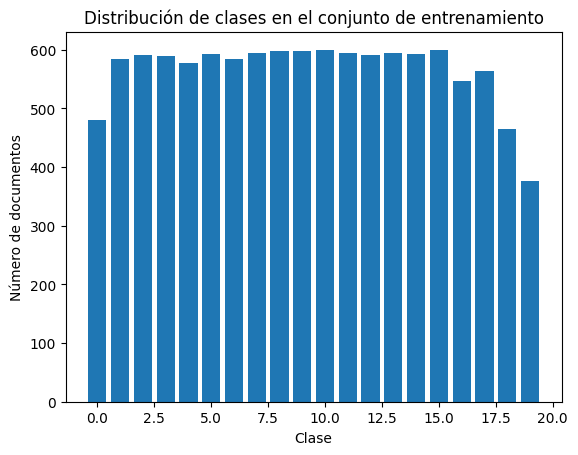

In [11]:
# Contar el número de documentos por clase
class_counts = np.bincount(y_train)

# Visualizar la distribución de clases
plt.bar(range(len(class_counts)), class_counts)
plt.xlabel('Clase')
plt.ylabel('Número de documentos')
plt.title('Distribución de clases en el conjunto de entrenamiento')
plt.show()


*Podemos observar que las clases están bien balanceadas, sin ser la útlima clase que tiene menos de 400 ejemplos.* 

💡 <em><font color='IndianRed'>Hipótesis:</font></em>
<em><font color='IndianRed'>No debería cambiar mucho el F1-Score al utilizar el clasificador ComplementNB con respecto al MultinominalNB.</font></em>

In [12]:
clf_complementNB = ComplementNB()
clf_complementNB.fit(X_train, y_train)

ComplementNB()

*Vemos el F1-Score:*

In [13]:
X_test = tfidfvect.transform(newsgroups_test.data)
y_test = newsgroups_test.target
y_pred =  clf_complementNB.predict(X_test)
f1_score(y_test, y_pred, average='macro')

np.float64(0.692953349950875)

⭐ <em><strong>Conclusión</strong></em> ⭐

<em><strong>Como podemos observar, sí cambió la métrica... Dió un mejor resultado para el clasificador ComplementNB. Esto puede ser debido a que si bien el dataset está balanceado, las frecuencias puede que afecte a dicho clasificador. En la [documentación](https://scikit-learn.org/stable/modules/naive_bayes.html#complement-naive-bayes) se dice que empíricamente la estimación de parámetros es más estable para CNB que para MNB, así como también que regularmente CNB obtiene una mejor performance en tareas de clasificación de texto.</strong></em>

🤖 <em><font color='DarkGoldenRod'>Consulta a IA (<small>ChatGPT 4o</small>):</font></em> 🤖


❔ <em><font color='GoldenRod'>Prompt:</font></em><em><font color='GoldenRod'>
Porque al utilizar MultinominalNB y ComplementNB, obtengo mejores resultados con ComplementNB? Según tengo entendido ComplementNB funciona mejor para clases desbalanceadas, pero en este caso (20newsgroup) las clases están casi balanceadas. No debería obtener la misma métrica de F1-Score?

Te adjunto el código:

clf_multinominalNB = MultinomialNB()
clf_multinominalNB.fit(X_train, y_train)
X_test = tfidfvect.transform(newsgroups_test.data)
y_test = newsgroups_test.target
y_pred =  clf_multinominalNB.predict(X_test)
f1_score(y_test, y_pred, average='macro')
np.float64(0.5854345727938506)

clf_multinominalNB = ComplementNB()
clf_multinominalNB.fit(X_train, y_train)
X_test = tfidfvect.transform(newsgroups_test.data)
y_test = newsgroups_test.target
y_pred =  clf_multinominalNB.predict(X_test)
f1_score(y_test, y_pred, average='macro')
np.float64(0.692953349950875)

</font></em>

🔃 <em><font color='BurlyWood'>Respuesta:</font></em><em><font color='BurlyWood'>
El hecho de que obtengas mejores resultados con ComplementNB en comparación con MultinomialNB, a pesar de que las clases están relativamente balanceadas en el dataset 20newsgroups, puede ser atribuido a las diferencias fundamentales en cómo estos dos algoritmos manejan la información, especialmente en el contexto de los datos textuales.
Diferencias entre MultinomialNB y ComplementNB

- MultinomialNB:
    Este clasificador asume que las características (en este caso, los términos o palabras) siguen una distribución multinomial. Es muy eficaz cuando las características están discretizadas (como en el caso de conteos de palabras).
    Sin embargo, es más sensible a desequilibrios en los datos, no solo en términos de clases, sino también en cómo se distribuyen las características dentro de cada clase.

- ComplementNB:
    Fue desarrollado específicamente para mejorar el rendimiento en problemas con clases desbalanceadas, pero sus beneficios no se limitan solo a este escenario.
    ComplementNB calcula el complemento de cada clase, lo que lo hace menos propenso a verse afectado por la presencia de características que puedan tener una distribución desbalanceada dentro de las clases.
    Este enfoque también puede ayudar a mitigar el impacto de palabras o características que tienen una alta frecuencia pero que no son tan discriminativas (es decir, aparecen en muchos documentos de diferentes clases).

Posible Explicación de la Diferencia en F1-Score

- Distribución de Características: Aunque las clases en el dataset 20newsgroups están relativamente balanceadas, es posible que la distribución de palabras (características) dentro de cada clase no lo esté. En estos casos, ComplementNB puede manejar mejor las palabras que son comunes a múltiples clases y, por lo tanto, lograr un mejor rendimiento.

- Regularización Implícita: ComplementNB actúa como una forma de regularización al suavizar las probabilidades, lo que puede ser beneficioso incluso en situaciones donde las clases están balanceadas. Esto puede ayudar a evitar el sobreajuste en clases específicas o características dominantes.

- Interacción con TF-IDF: La transformación TF-IDF tiende a resaltar las características más distintivas, pero también puede aumentar la dispersión de las probabilidades calculadas por MultinomialNB. ComplementNB, al trabajar con el complemento, puede suavizar este efecto y proporcionar una mejor discriminación entre clases.

Conclusión

El mejor rendimiento de ComplementNB en tu caso no se debe únicamente al balance de clases, sino más bien a su capacidad para manejar la distribución de las características (palabras) de manera más robusta. Esto hace que sea más adecuado para manejar ciertos tipos de variabilidad en datos textuales, incluso cuando las clases están balanceadas, lo que explica la diferencia en el F1-Score.

</font></em>

*Para verificar lo "dicho" por ChatGPT, podemos ver la distribución de los términos para el conjunto de X_Train. Para hacer esto, dado que es una matriz dispersa, podemos sumar las frecuencias a lo largo de todas las filas para obtener la distribución de cada término y luego graficar:*

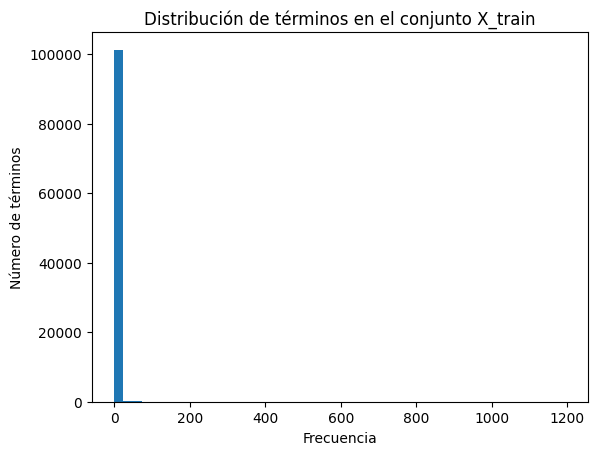

In [14]:
# Sumo todas filas (por columnas). O sea, obtengo una lista del tamaño de mi
# vocabulario, en donde cada columna es un término y el valor de dicha columna
# es la frecuencia acumulada para dicho término en todo el corpus (cuantas veces
# aparece el término en mi corpus -X_Train)
terms_distribution = np.array(X_train.sum(axis=0)).flatten()

plt.hist(terms_distribution, bins=50)
plt.xlabel('Frecuencia')
plt.ylabel('Número de términos')
plt.title('Distribución de términos en el conjunto X_train')
plt.show()

*Efectivamente, hay términos que se repiten muchas veces en muchos documentos y no nos aportan para clasificarlos. Como ejemplo podemos obtener el término que más se repite:*

In [15]:
print(f"Término con mayor TF-IDF: {terms_distribution.max()}")
print(f"Corresponde al término: {idx2word[terms_distribution.argmax()]}")

Término con mayor TF-IDF: 1195.8292316236689
Corresponde al término: the


*Si graficamos únicamente los términos que aparecen menos de 50 veces:*

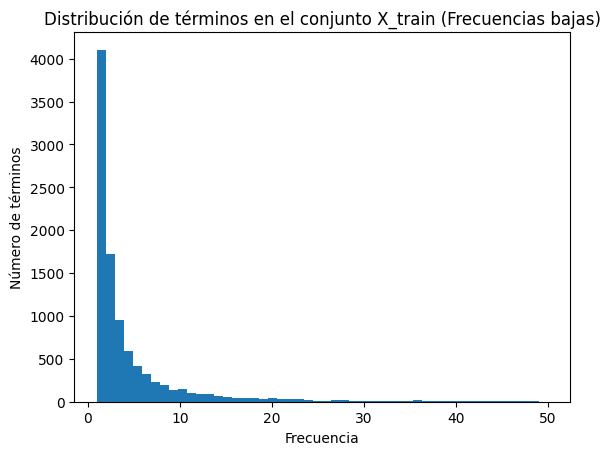

In [16]:
low_freq_terms = terms_distribution[terms_distribution < 50]

# Visualización de la distribución de frecuencias bajas
plt.hist(low_freq_terms, bins=50, range=(1, 50))
plt.xlabel('Frecuencia')
plt.ylabel('Número de términos')
plt.title('Distribución de términos en el conjunto X_train (Frecuencias bajas)')
plt.show()


<em>

Podemos observar que hay menor desbalance.

Con esta información, ahora probamos eliminar estos términos comunes para ver si mejora nuestro modelo:

</em>

In [17]:
# Escribimos de nuevo el código anterior pero eliminando estas palabras comunes.
tfidfvect = TfidfVectorizer(stop_words='english')
X_train = tfidfvect.fit_transform(newsgroups_train.data)

idx2word = {v: k for k,v in tfidfvect.vocabulary_.items()}

*Chequeamos que efectivamente "the" no esté en el vocabulario:*

In [18]:
vocab = tfidfvect.get_feature_names_out()

# Verificar si "the" fue eliminado
print('the' in vocab)  # Debería imprimir False si se eliminó correctamente

False


*Probamos nuevamente ambos modelos:*

*MultinomialNB $\rightarrow$*

In [19]:
clf_multinominalNB = MultinomialNB()
clf_multinominalNB.fit(X_train, y_train)
X_test = tfidfvect.transform(newsgroups_test.data)
y_test = newsgroups_test.target
y_pred =  clf_multinominalNB.predict(X_test)
f1_score(y_test, y_pred, average='macro')

np.float64(0.6467991505900852)

*ComplementNB $\rightarrow$*

In [20]:
clf_complementNB = ComplementNB()
clf_complementNB.fit(X_train, y_train)
X_test = tfidfvect.transform(newsgroups_test.data)
y_test = newsgroups_test.target
y_pred =  clf_complementNB.predict(X_test)
f1_score(y_test, y_pred, average='macro')

np.float64(0.6936107849650025)

💡 <em><font color='IndianRed'>Hipótesis:</font></em>
<em><font color='IndianRed'>Según la informa´cion, podríamos mejorar aún más la métrica si utilizamos un "threshold" para filtrar aquellos términos que tengan mayor frecuencia a la deseada.</font></em>

In [21]:
tfidfvect = TfidfVectorizer(stop_words='english', max_df=0.05)
X_train = tfidfvect.fit_transform(newsgroups_train.data)

idx2word = {v: k for k,v in tfidfvect.vocabulary_.items()}

clf_multinominalNB = MultinomialNB()
clf_multinominalNB.fit(X_train, y_train)
X_test = tfidfvect.transform(newsgroups_test.data)
y_test = newsgroups_test.target
y_pred =  clf_multinominalNB.predict(X_test)
print(f"MultinomialNB: {f1_score(y_test, y_pred, average='macro')}")

clf_complementNB = ComplementNB()
clf_complementNB.fit(X_train, y_train)
X_test = tfidfvect.transform(newsgroups_test.data)
y_test = newsgroups_test.target
y_pred =  clf_complementNB.predict(X_test)
print(f"ComplementNB: {f1_score(y_test, y_pred, average='macro')}")

MultinomialNB: 0.6520043001905261
ComplementNB: 0.6927588153624337


⭐ <em><strong>Conclusión</strong></em> ⭐

<em><strong>Efectivamente mejoramos la métrica en algunos puntos, sin embargo para ComplementNB no cambió mucho, dando aún más evidencia de su robustez para la utilización en clasificación de texto.</strong></em>

*Para finalizar optimizamos los modelos para obtener los mejores hiperparámetros:*

In [22]:
grid_search_parms = {
    "alpha": [0.01, 0.1, 1.0, 10.0]
}

clf_multi_nb_grid_search = GridSearchCV(clf_multinominalNB, grid_search_parms, scoring='f1_macro', cv=5)
clf_multi_nb_grid_search.fit(X_test, y_test)
y_pred_multi_nb = clf_multi_nb_grid_search.best_estimator_.predict(X_test)
print(f"Multinomial Naive Bayes F1-Score: {f1_score(y_test, y_pred_multi_nb, average='macro'):.2f}")

clf_comp_nb_grid_search = GridSearchCV(clf_complementNB, grid_search_parms, scoring='f1_macro', cv=5)
clf_comp_nb_grid_search.fit(X_test, y_test)
y_pred_comp_nb = clf_comp_nb_grid_search.best_estimator_.predict(X_test)
print(f"Complement Naive Bayes F1-Score: {f1_score(y_test, y_pred_comp_nb, average='macro'):.2f}")

Multinomial Naive Bayes F1-Score: 0.96
Complement Naive Bayes F1-Score: 0.90


### Parte 3

> Transponer la matriz documento-término. De esa manera se obtiene una matriz término-documento que puede ser interpretada como una colección de vectorización de palabras.  
Estudiar ahora similaridad entre palabras tomando 5 palabras y estudiando sus 5 más similares.  
**La elección de palabras no debe ser al azar para evitar la aparición de términos poco interpretables, elegirlas "manualmente"**.


*Primeramente, transponemos la matriz de documento-término, obteniendo una matriz de término-documento, en donde cada fila representa un término y cada columna representa un documento:*

In [23]:
X_train_T = X_train.T
X_train_T.shape

(101233, 11314)

<em>

De la lista de términos, elegimos los siguientes 5 términos:
- car
- small
- engine
- history
- early

</em>

*Realizamos el mismo proceso que en la parte 1:*

🔮 <em><font color='violet'>Función auxiliar:</font></em>
<em><font color='violet'>Imprime las 5 palabras más similares de una lista de palabras.</font></em>

In [24]:
def print_5_most_similar_words(words: list) -> None:
    word_idx = [tfidfvect.vocabulary_[word] for word in words]

    df_data = []

    for idx in word_idx:
        cos_sim_docs = cosine_similarity(X_train_T[idx], X_train_T).flatten()
        cos_sim_docs_val = np.sort(cos_sim_docs)[::-1][1:6]
        cos_sim_docs_idx = np.argsort(cos_sim_docs)[::-1][1:6]

        df_row = {
            "Término": idx2word[idx],
            "Término Similar 1": f"Termino: {idx2word[cos_sim_docs_idx[0]]} | Valor : {cos_sim_docs_val[0]:.2f}",
            "Término Similar 2": f"Termino: {idx2word[cos_sim_docs_idx[1]]} | Valor : {cos_sim_docs_val[1]:.2f}",
            "Término Similar 3": f"Termino: {idx2word[cos_sim_docs_idx[2]]} | Valor : {cos_sim_docs_val[2]:.2f}",
            "Término Similar 4": f"Termino: {idx2word[cos_sim_docs_idx[3]]} | Valor : {cos_sim_docs_val[3]:.2f}",
            "Término Similar 5": f"Termino: {idx2word[cos_sim_docs_idx[4]]} | Valor : {cos_sim_docs_val[4]:.2f}",
        }

        df_data.insert(0, df_row)

    df = pd.DataFrame(df_data)
    # print(df.to_markdown())
    display(HTML(df.to_html()))

*Imprimimos los 5 términos más similares:*

In [25]:
words = ['car', 'small', 'engine', 'history', 'early']
print_5_most_similar_words(words)

,Término,Término Similar 1,Término Similar 2,Término Similar 3,Término Similar 4,Término Similar 5
0,early,Termino: standout | Valor : 0.21,Termino: derrick | Valor : 0.21,Termino: consulted | Valor : 0.16,Termino: rioter | Valor : 0.15,Termino: reprinting | Valor : 0.15
1,history,Termino: inalcik | Valor : 0.28,Termino: sarkis | Valor : 0.28,Termino: tibor | Valor : 0.28,Termino: goodrich | Valor : 0.28,Termino: roderic | Valor : 0.28
2,engine,Termino: mountings | Valor : 0.20,Termino: guesser | Valor : 0.20,Termino: tripmeter | Valor : 0.20,Termino: mels | Valor : 0.19,Termino: buckled | Valor : 0.19
3,small,Termino: adequete | Valor : 0.18,Termino: earnings | Valor : 0.16,Termino: orgs | Valor : 0.16,Termino: governemtn | Valor : 0.16,Termino: amngst | Valor : 0.16
4,car,Termino: cars | Valor : 0.19,Termino: dealer | Valor : 0.17,Termino: criterium | Valor : 0.17,Termino: civic | Valor : 0.17,Termino: loan | Valor : 0.16


💡 <em><font color='IndianRed'>Hipótesis:</font></em>
<em><font color='IndianRed'>En la tabla anterior podemos observar varios términos que no tienen mucha similitud. Esto puede ser porque en la parte anterior filtramos "stop words" con el objetivo de ser más específicos y que los términos clasifiquen mejor nuestros documentos. Si realizamos con el vocabulario original, deberíamos sí tener mucha similitud para estos términos que son muy frecuentes.</font></em>

*Realizamos la prueba con el vocabulario original:*

In [28]:
tfidfvect = TfidfVectorizer()
X_train = tfidfvect.fit_transform(newsgroups_train.data)
idx2word = {v: k for k,v in tfidfvect.vocabulary_.items()}
X_train_T = X_train.T
words = ['was', 'if', 'me', 'the', 'from']
print_5_most_similar_words(words)

,Término,Término Similar 1,Término Similar 2,Término Similar 3,Término Similar 4,Término Similar 5
0,from,Termino: the | Valor : 0.49,Termino: to | Valor : 0.45,Termino: and | Valor : 0.44,Termino: of | Valor : 0.43,Termino: in | Valor : 0.41
1,the,Termino: of | Valor : 0.79,Termino: to | Valor : 0.76,Termino: and | Valor : 0.75,Termino: in | Valor : 0.72,Termino: is | Valor : 0.68
2,me,Termino: to | Valor : 0.38,Termino: if | Valor : 0.35,Termino: and | Valor : 0.34,Termino: please | Valor : 0.34,Termino: for | Valor : 0.33
3,if,Termino: to | Valor : 0.51,Termino: the | Valor : 0.49,Termino: you | Valor : 0.48,Termino: is | Valor : 0.47,Termino: it | Valor : 0.46
4,was,Termino: the | Valor : 0.48,Termino: that | Valor : 0.42,Termino: of | Valor : 0.41,Termino: in | Valor : 0.41,Termino: and | Valor : 0.40


⭐ <em><strong>Conclusión</strong></em> ⭐

<em><strong>Como conclusión final, podemos ver que si elegimos términos frecuentes, efectivamente obtenemos palabras similares con una alto valor de similitud de coseno. Por lo que, para casos en donde hay mucha frecuencia de palabras, TF-IDF es relativamente bueno para realizar búsquedas de similitudes.</strong></em>